In [ ]:
import json

In [ ]:
from whisper_jax import FlaxWhisperPipline
import jax.numpy as jnp

model = "tiny" # could be "medium" or "large-v2". medium is probably the most pragmatic balance
pipeline = FlaxWhisperPipline(f"openai/whisper-{model}", dtype=jnp.bfloat16)


/Users/shy/Projects/genad/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/shy/Projects/genad/env/lib/python3.10/site-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/Users/shy/Projects/genad/env/lib/python3.10/site-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated wor

In [ ]:
# JIT compile the forward call - slow, but we only do once
# testing on a minute long clip
text = pipeline("output.mp3", return_timestamps=True)

Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


In [ ]:
# JAXed up
text = pipeline("output.mp3", return_timestamps=True)
text

Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


{'text': " In the last chapter, you and I started to step through the internal workings of a transformer. This is one of the key pieces of technology inside large language models, and a lot of other tools in the modern way of AI. It first hit the scene and a now famous 2017 paper called Attention as All You Need, and in this chapter, you and I will dig into what this attention mechanism is, visualizing how it processes data. As a quick recap, here's the important context I want you to have in mind. The goal of the model that you and I are studying is to take in a piece of text and predict what word comes next. The input text is broken up into little pieces that we call tokens, and these are very often words or pieces of words, but just to make the examples in this video easier for you and me to think about, let's simplify by pretending that tokens are always just words. The first step in a transformer is to associate each token with a high dimensional vector, what we call its embedding

In [ ]:
import whisper_timestamped as whisper

# docs: https://github.com/linto-ai/whisper-timestamped

model = whisper.load_model("tiny", device="cpu")

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



100%|██████████████████████████████████████| 72.1M/72.1M [01:19<00:00, 950kiB/s]


Detected language: English


100%|██████████| 5998/5998 [00:03<00:00, 1843.57frames/s]

{
  "text": " In the last chapter, you and I started to step through the internal workings of a transformer. This is one of the key pieces of technology inside large language models, and a lot of other tools in the modern way of AI. It first hit the scene and a now famous 2017 paper called Attention as All You Need, and in this chapter, you and I will dig into what this attention mechanism is, visualizing how it processes data. As a quick recap, here's the important context I want you to have in mind. The goal of the model that you and I are studying is to take in a piece of text and predict what word comes next. The input text is broken up into little pieces that we call tokens, and these are very often words or pieces of words, but just to make the examples in this video easier for you and me to think about, let's simplify by pretending that tokens are always just words. The first step in a transformer is to associate each token with a high-dimensional vector, what we call its embedd

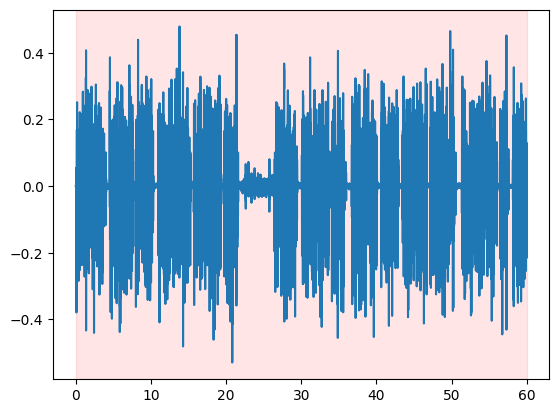

  0%|          | 0/5998 [00:00<?, ?frames/s]

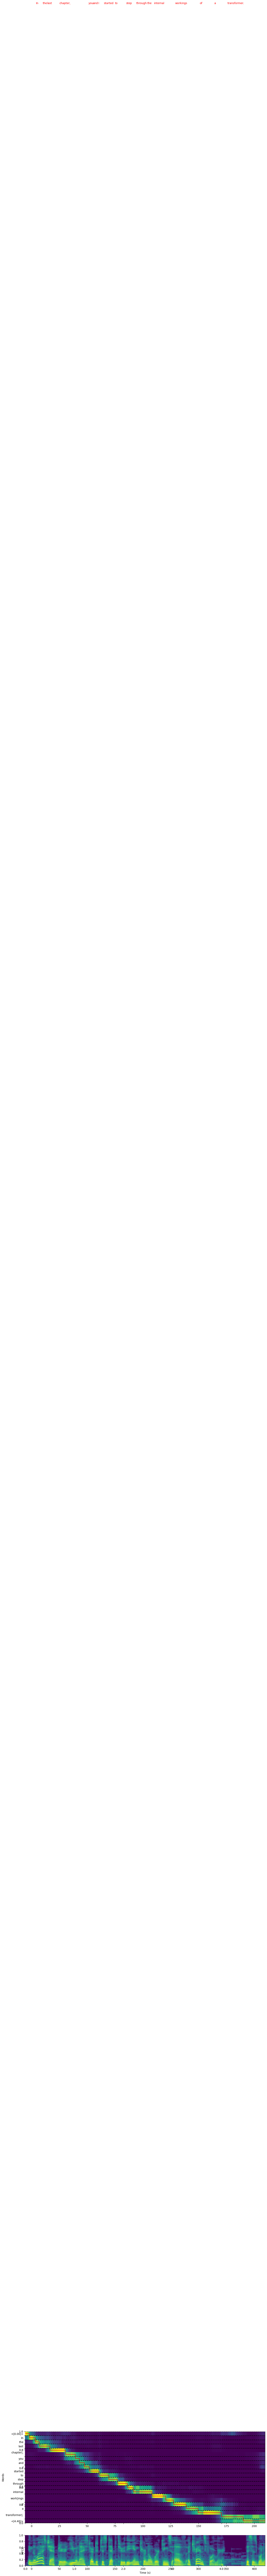

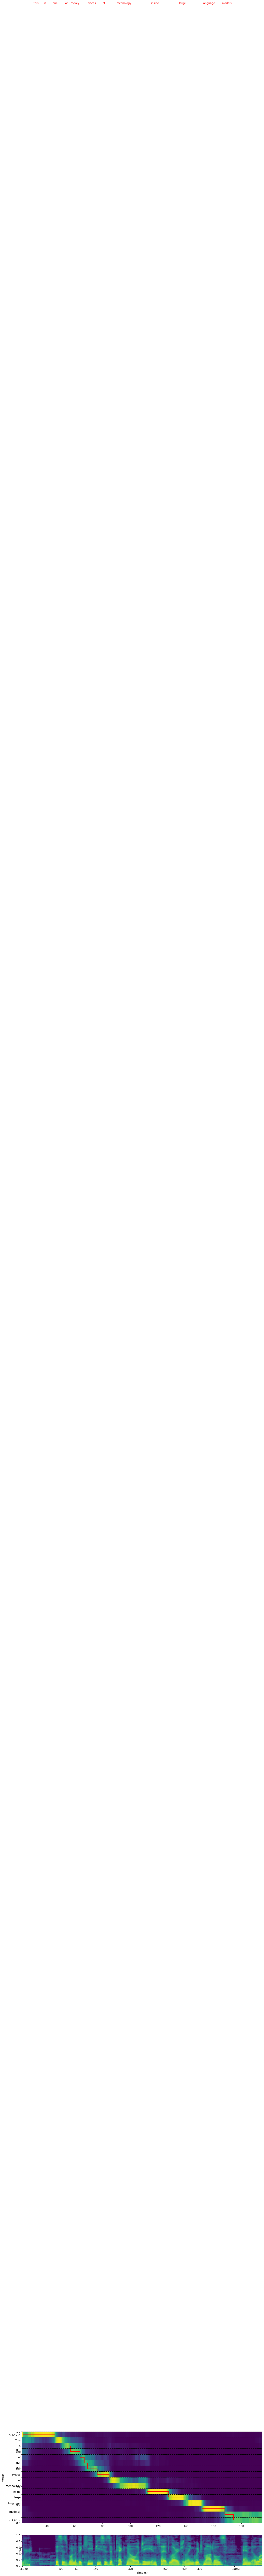

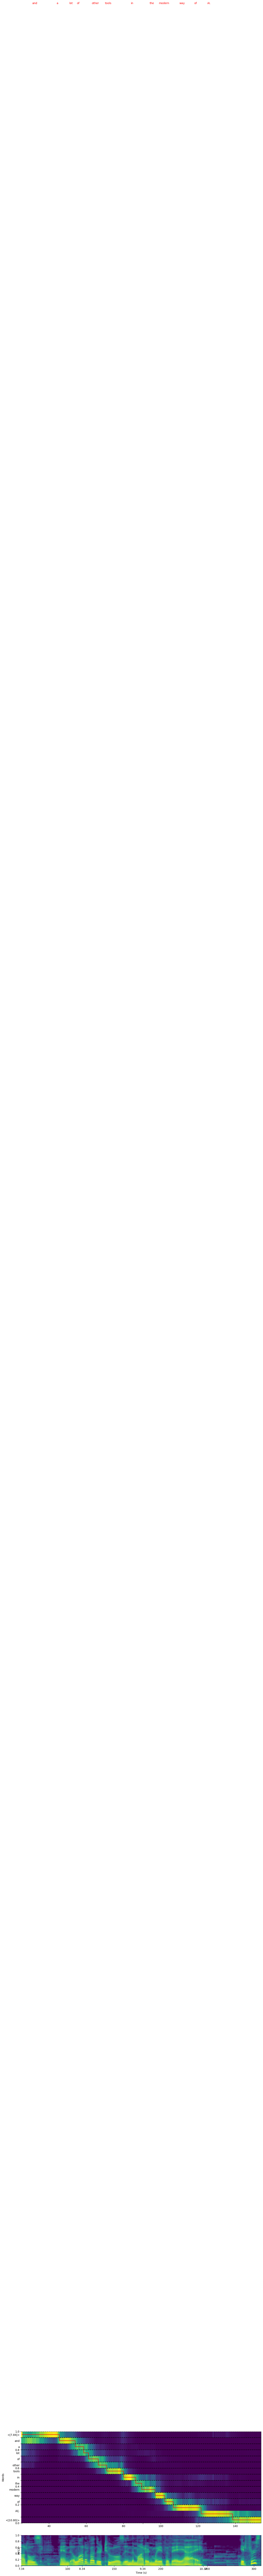

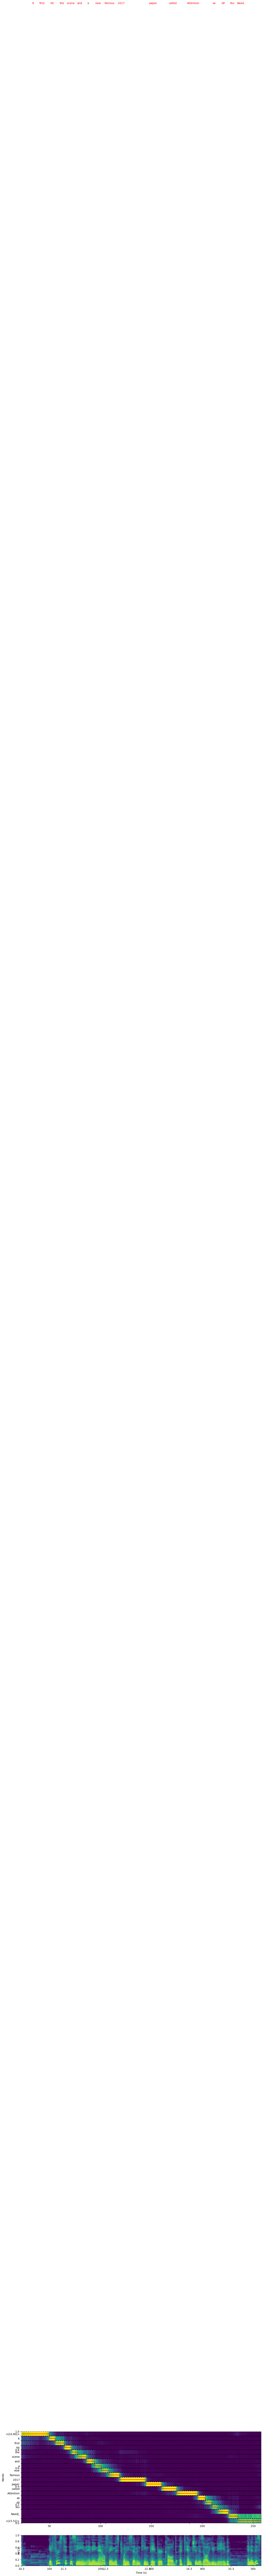

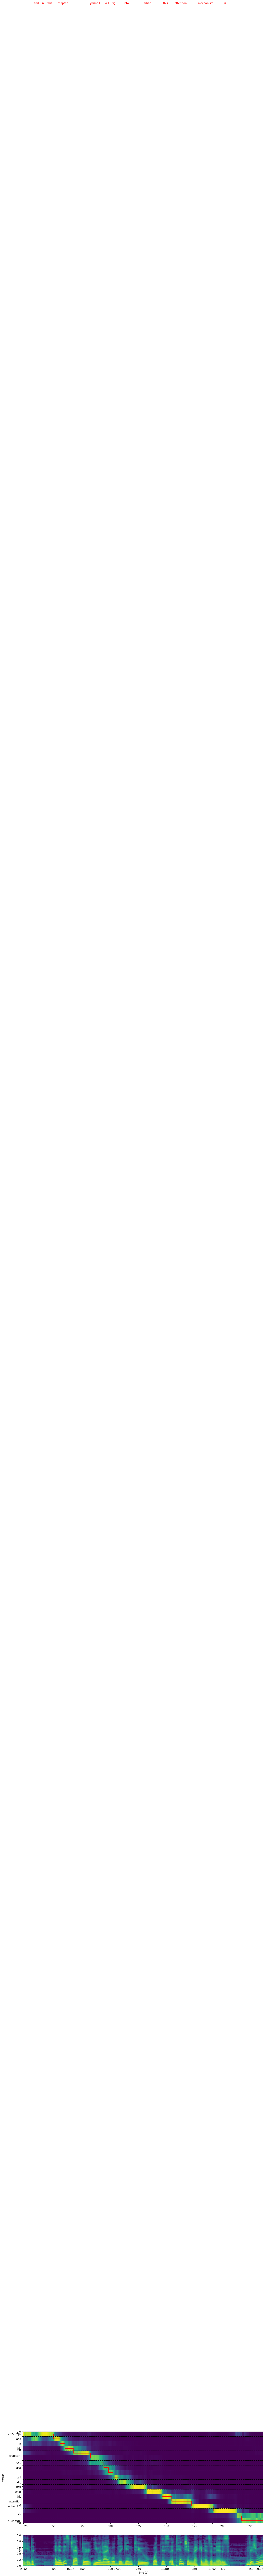

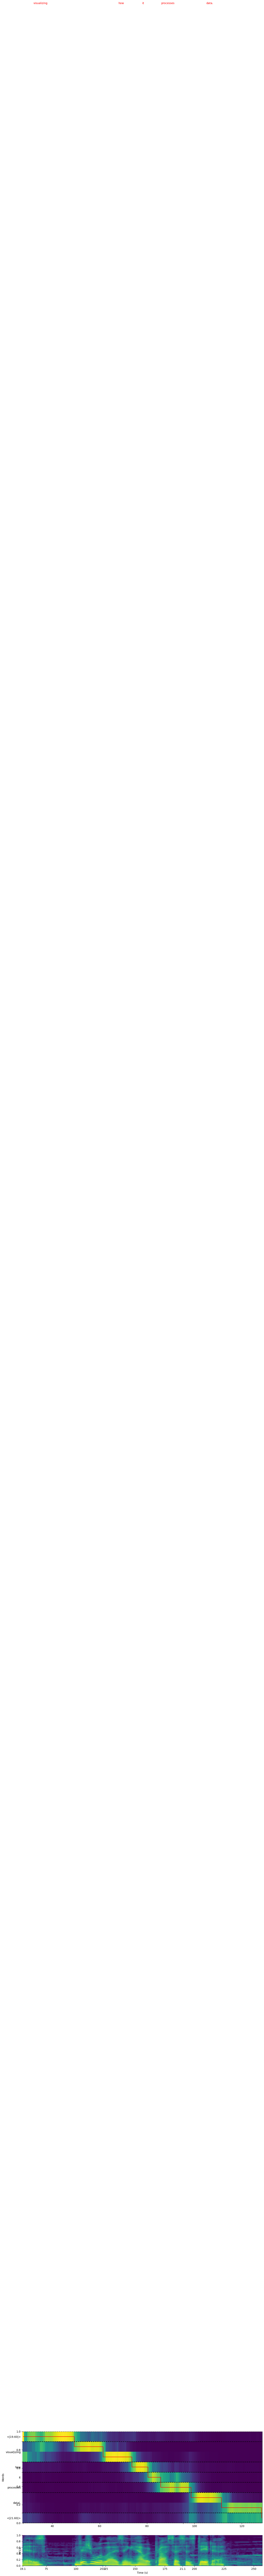

 50%|█████     | 3000/5998 [00:09<00:09, 327.07frames/s]

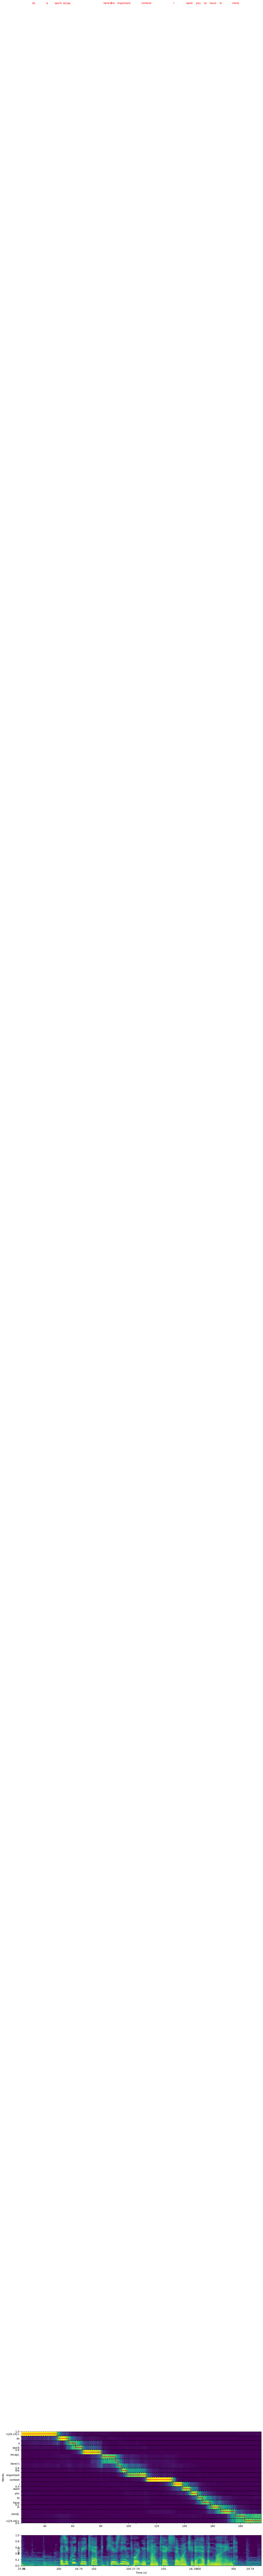

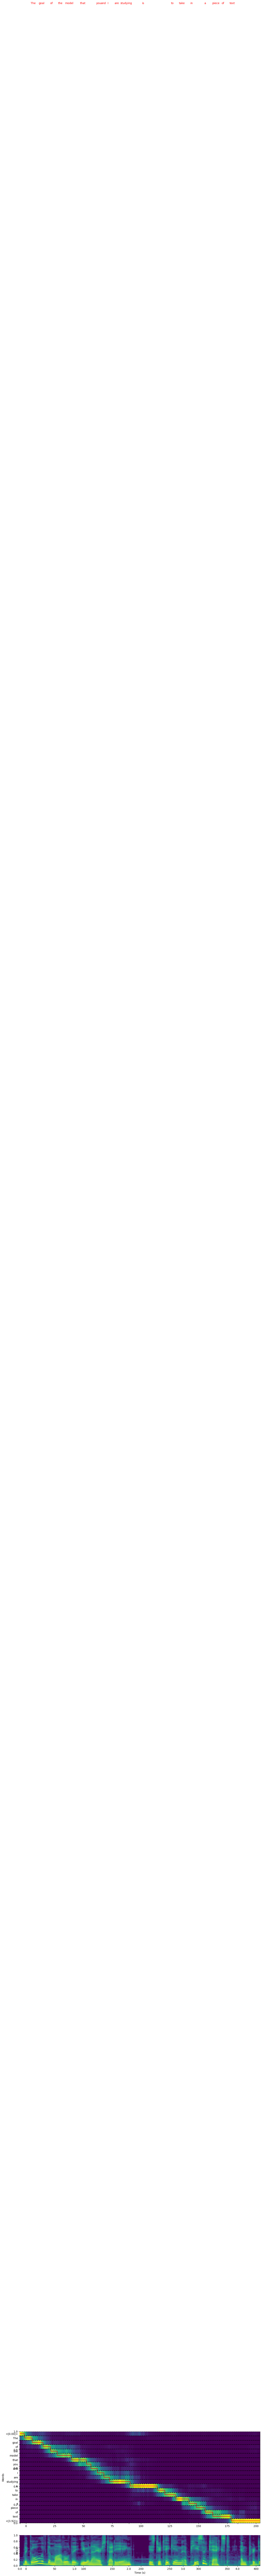

In [ ]:
audio = whisper.load_audio("data/transcribe_test.mp3")
result = whisper.transcribe(model, audio, language="en", vad="auditok", plot_word_alignment=True) # type: ignore

print(json.dumps(result, indent = 2, ensure_ascii = False))

In [ ]:
def convert_transcript_to_json(transcript):
    return [
            {
                "text": chunk['text'].strip(),
                "start": chunk['timestamp'][0],
                "end": chunk['timestamp'][1]
            }
            for chunk in transcript['chunks']
        ]

processed_transcript = convert_transcript_to_json(text)
print(processed_transcript)


[{'text': 'In the last chapter, you and I started to step through the internal workings of a transformer.', 'start': 0.0, 'end': 4.4}, {'text': 'This is one of the key pieces of technology inside large language models,', 'start': 4.4, 'end': 7.84}, {'text': 'and a lot of other tools in the modern way of AI.', 'start': 7.84, 'end': 10.8}, {'text': 'It first hit the scene and a now-famous 2017 paper called Attention as All You Need,', 'start': 10.8, 'end': 15.52}, {'text': 'and in this chapter, you and I will dig into what this attention mechanism is,', 'start': 15.52, 'end': 19.68}, {'text': 'visualizing how it processes data.', 'start': 19.68, 'end': 21.6}, {'text': "As a quick recap, here's the important context I want you to have in mind.", 'start': 26.48, 'end': 30.12}, {'text': 'The goal of the model that you and I are studying is to take in a piece of text and predict', 'start': 30.12, 'end': 34.72}, {'text': 'what word comes next.', 'start': 34.72, 'end': 36.8}, {'text': 'The inp

In [ ]:
from pathlib import Path

def get_video_files(data_directory):
    video_files = [file for file in data_directory.glob('*') if file.suffix.lower() in ['.mp4', '.mov', '.avi', '.mkv']]
    return video_files

data_directory = Path('data')
video_files = get_video_files(data_directory)
print("Video files in 'data' directory:", video_files)



Video files in 'data' directory: [PosixPath('data/IMG_1406.MOV'), PosixPath('data/IMG_1407.MOV'), PosixPath('data/IMG_1411.MOV'), PosixPath('data/IMG_1405.MOV'), PosixPath('data/IMG_1404.MOV'), PosixPath('data/IMG_1410.MOV'), PosixPath('data/IMG_1399.MOV'), PosixPath('data/IMG_1414.MOV'), PosixPath('data/IMG_1400.MOV'), PosixPath('data/IMG_1415.MOV'), PosixPath('data/IMG_1398.MOV'), PosixPath('data/IMG_1417.MOV'), PosixPath('data/IMG_1416.MOV'), PosixPath('data/IMG_1444.MOV'), PosixPath('data/IMG_1446.MOV'), PosixPath('data/IMG_1442.MOV'), PosixPath('data/IMG_1441.MOV'), PosixPath('data/IMG_1382.MOV'), PosixPath('data/IMG_1396.MOV'), PosixPath('data/IMG_1427.MOV'), PosixPath('data/IMG_1432.MOV'), PosixPath('data/IMG_1426.MOV'), PosixPath('data/IMG_1397.MOV'), PosixPath('data/IMG_1383.MOV'), PosixPath('data/IMG_1381.MOV'), PosixPath('data/IMG_1418.MOV'), PosixPath('data/IMG_1419.MOV'), PosixPath('data/IMG_1425.MOV'), PosixPath('data/IMG_1431.MOV'), PosixPath('data/IMG_1384.MOV'), PosixP

In [ ]:
import subprocess

# Function to extract mp3 from mp4
def extract_wav_from_video(video_path, output_directory):
    wav_path = output_directory / f"{video_path.stem}.wav"
    command = f"ffmpeg -i {video_path} -ar 16000 -ac 1 -c:a pcm_s16le {wav_path}"
    subprocess.run(command, shell=True)
    return wav_path

# Create a directory for the extracted mp3 files if it doesn't exist
wav_directory = data_directory / 'wav'
wav_directory.mkdir(exist_ok=True)

# Extract mp3 files from each mp4 file
extracted_wavs = [extract_wav_from_video(video_file, wav_directory) for video_file in video_files]
print("Extracted WAV files:", extracted_wavs)


ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1.1_4 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopen

Extracted MP3 files: [PosixPath('data/wav/IMG_1406.wav'), PosixPath('data/wav/IMG_1407.wav'), PosixPath('data/wav/IMG_1411.wav'), PosixPath('data/wav/IMG_1405.wav'), PosixPath('data/wav/IMG_1404.wav'), PosixPath('data/wav/IMG_1410.wav'), PosixPath('data/wav/IMG_1399.wav'), PosixPath('data/wav/IMG_1414.wav'), PosixPath('data/wav/IMG_1400.wav'), PosixPath('data/wav/IMG_1415.wav'), PosixPath('data/wav/IMG_1398.wav'), PosixPath('data/wav/IMG_1417.wav'), PosixPath('data/wav/IMG_1416.wav'), PosixPath('data/wav/IMG_1444.wav'), PosixPath('data/wav/IMG_1446.wav'), PosixPath('data/wav/IMG_1442.wav'), PosixPath('data/wav/IMG_1441.wav'), PosixPath('data/wav/IMG_1382.wav'), PosixPath('data/wav/IMG_1396.wav'), PosixPath('data/wav/IMG_1427.wav'), PosixPath('data/wav/IMG_1432.wav'), PosixPath('data/wav/IMG_1426.wav'), PosixPath('data/wav/IMG_1397.wav'), PosixPath('data/wav/IMG_1383.wav'), PosixPath('data/wav/IMG_1381.wav'), PosixPath('data/wav/IMG_1418.wav'), PosixPath('data/wav/IMG_1419.wav'), PosixP

[out#0/wav @ 0x1580199a0] video:0kB audio:903kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.008439%
size=     903kB time=00:00:28.88 bitrate= 256.0kbits/s speed= 556x    


In [ ]:
# Transcribe each MP3 file using the Whisper pipeline with timestamps and save the transcripts
import json

def transcribe_and_save(mp3_file_path, output_directory):
    transcription_result = pipeline(str(mp3_file_path), return_timestamps=True)
    transcript_json = convert_transcript_to_json(transcription_result)
    
    # Define the output path for the transcript
    output_transcript_path = output_directory / f"{mp3_file_path.stem}.json"
    
    # Write the transcription to a file as a JSON object
    with open(output_transcript_path, 'w') as file:
        json.dump(transcript_json, file)
    
    return output_transcript_path

# Create a directory for the transcripts if it doesn't exist
transcript_directory = data_directory / 'transcripts'
transcript_directory.mkdir(exist_ok=True)

# Transcribe each MP3 file and save the transcripts with timestamps
transcribed_files = [transcribe_and_save(mp3_file, transcript_directory) for mp3_file in extracted_mp3_files]
print("Transcribed files saved with timestamps:", transcribed_files)



Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Transcribed files saved with timestamps: [PosixPath('data/transcripts/IMG_1406.json'), PosixPath('data/transcripts/IMG_1407.json'), PosixPath('data/transcripts/IMG_1411.json'), PosixPath('data/transcripts/IMG_1405.json'), PosixPath('data/transcripts/IMG_1404.json'), PosixPath('data/transcripts/IMG_1410.json'), PosixPath('data/transcripts/IMG_1399.json'), PosixPath('data/transcripts/IMG_1414.json'), PosixPath('data/transcripts/IMG_1400.json'), PosixPath('data/transcripts/IMG_1415.json'), PosixPath('data/transcripts/IMG_1398.json'), PosixPath('data/transcripts/IMG_1417.json'), PosixPath('data/transcripts/IMG_1416.json'), PosixPath('data/transcripts/IMG_1444.json'), PosixPath('data/transcripts/IMG_1446.json'), PosixPath('data/transcripts/IMG_1442.json'), PosixPath('data/transcripts/IMG_1441.json'), PosixPath('data/transcripts/IMG_1382.json'), PosixPath('data/transcripts/IMG_1396.json'), PosixPath('data/transcripts/IMG_1427.json'), PosixPath('data/transcripts/IMG_1432.json'), PosixPath('da

In [ ]:
import os

# Load OpenAI API key from environment variable
openai_api_key = os.getenv("OPENAI_API_KEY")
if openai_api_key is None:
    raise ValueError("OpenAI API key not found. Please set the OPENAI_API_KEY environment variable.")
print("OpenAI API key loaded successfully.")


OpenAI API key loaded successfully.


In [ ]:
from martian import OpenAI
import json

client = OpenAI(api_key="sk-f03ca33fc0084f05ae1323049fb4cd59")

# Load OpenAI API key from environment variable
#openai.api_key = os.getenv("OPENAI_API_KEY")

if openai_api_key is None:
    raise ValueError("OpenAI API key not found. Please set the OPENAI_API_KEY environment variable.")

def select_storyboard_segments(transcript_files, goal):
    # Define the prompt for selecting relevant segments
    transcripts = []
    for transcript_file in transcript_files:
        with open(transcript_file, 'r') as file:
            transcript = json.load(file)
            parsed_transcript = transcript_file.stem + "\n" + "\n".join(f"{i}: {x['text']}" for i, x in enumerate(transcript, start=1))
            transcripts.append(parsed_transcript)

    system_prompt = f"""You are producing a storyboard for a video with the following instruction: `{goal}`. Your goal is to select sentences from each of the given transcripts to stitch together into a final video.\
Return a json file with a list of tuples named `segments`, each containing a `video` field with the filename and a `idx` field with the index of the sentence in that video."""
    user_prompt = "\n\n".join(transcripts)
    print(system_prompt)
    print(user_prompt)
    
    # Get the response from GPT-4
    response = client.chat.completions.create(
    model="gpt-4o",
    response_format={ "type": "json_object" },
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
    ],
    temperature=0
    )

    relevant_segments = response.choices[0].message.content.strip()
    
    # replace ```json and ``` with nothing
    relevant_segments = relevant_segments.replace("```json", "").replace("```", "")
    
    return relevant_segments

# Define the high level goal
high_level_goal = "make a training video showing how french drain hydrojetting works"

# Select relevant segments for the storyboard
raw_storyboard = select_storyboard_segments(transcribed_files, high_level_goal)
storyboard = json.loads(raw_storyboard)
print("Storyboard segments selected:", json.dumps(storyboard, indent=4))



You are producing a storyboard for a video with the following instruction: `make a training video showing how french drain hydrojetting works`. Your goal is to select sentences from each of the given transcripts to stitch together into a final video.Return a json file with a list of tuples named `segments`, each containing a `video` field with the filename and a `idx` field with the index of the sentence in that video.
IMG_1406
1: Oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, o

APIConnectionError: Connection error.

In [ ]:
print(storyboard)

{'segments': [{'video': 'IMG_1407', 'idx': 1}, {'video': 'IMG_1404', 'idx': 3}, {'video': 'IMG_1398', 'idx': 8}, {'video': 'IMG_1417', 'idx': 1}, {'video': 'IMG_1405', 'idx': 1}, {'video': 'IMG_1410', 'idx': 1}]}


In [ ]:
print(raw_storyboard)

```json
{
  "segments": [
    {
      "video": "IMG_1407",
      "idx": 1
    },
    {
      "video": "IMG_1404",
      "idx": 3
    },
    {
      "video": "IMG_1398",
      "idx": 8
    },
    {
      "video": "IMG_1417",
      "idx": 1
    },
    {
      "video": "IMG_1441",
      "idx": 2
    },
    {
      "video": "IMG_1405",
      "idx": 1
    },
    {
      "video": "IMG_1410",
      "idx": 1
    }
  ]
}
```


In [ ]:
from moviepy.editor import VideoFileClip, concatenate_videoclips
import json

#storyboard = json.loads(storyboard)

clips = []
for segment in storyboard['segments']:
    video_file = f"data/{segment['video']}.MOV"
    transcript_file = f"data/transcripts/{segment['video']}.json"
    
    with open(transcript_file, 'r') as file:
        transcript = json.load(file)
    
    clip_info = transcript[segment['idx'] - 1]  # Adjust index since JSON is 0-indexed
    start_time = clip_info['start']
    end_time = clip_info['end']
    
    video_clip = VideoFileClip(video_file).subclip(start_time, end_time)
    clips.append(video_clip)

# Concatenate all clips into one final video
final_clip = concatenate_videoclips(clips, method="compose")
final_clip.write_videofile("final_output.mp4", threads = 8)

t:  25%|██▍       | 326/1306 [01:02<02:23,  6.82it/s, now=None]

Moviepy - Building video final_output.mp4.
MoviePy - Writing audio in final_outputTEMP_MPY_wvf_snd.mp3


t:  25%|██▍       | 326/1306 [01:02<02:23,  6.82it/s, now=None]

MoviePy - Done.
Moviepy - Writing video final_output.mp4



t:  25%|██▍       | 326/1306 [04:07<02:23,  6.82it/s, now=None]

Moviepy - Done !
Moviepy - video ready final_output.mp4
